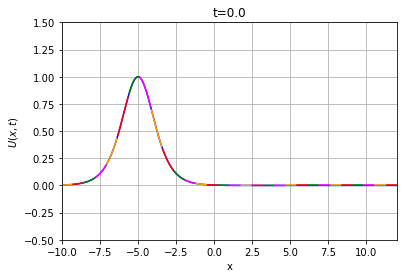

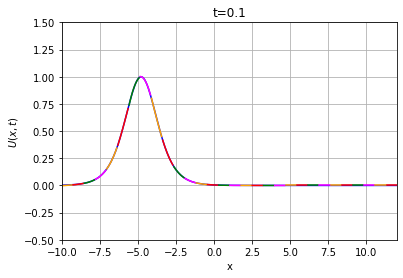

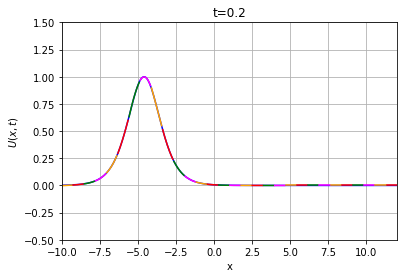

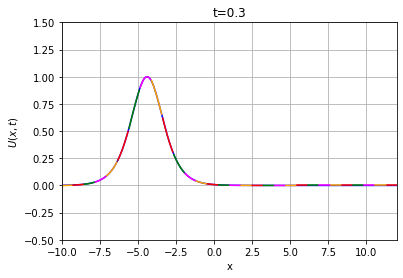

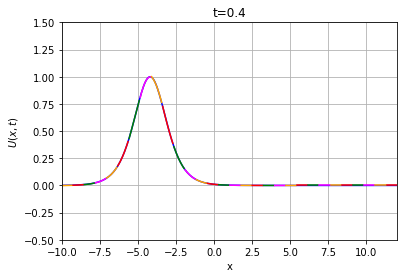

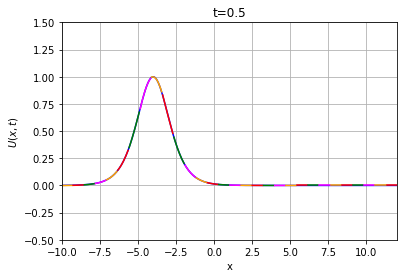

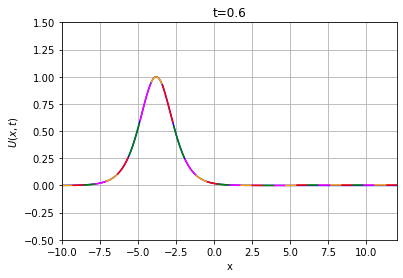

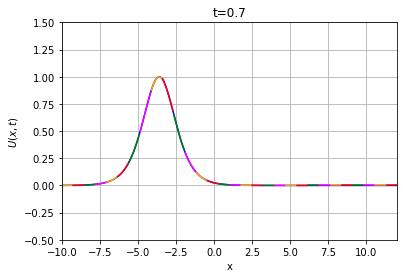

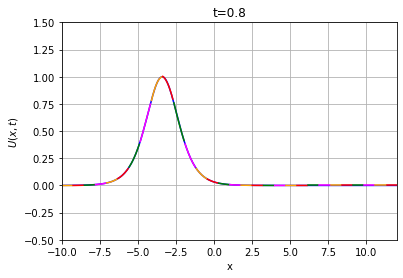

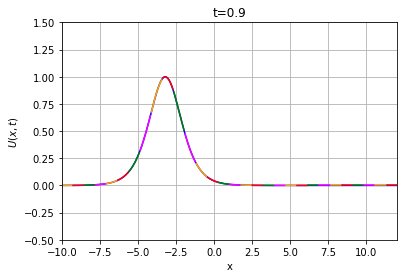

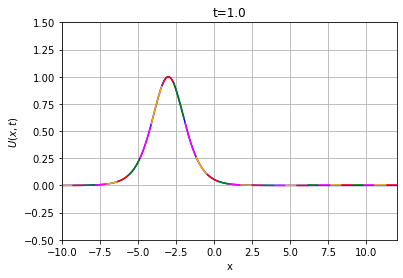

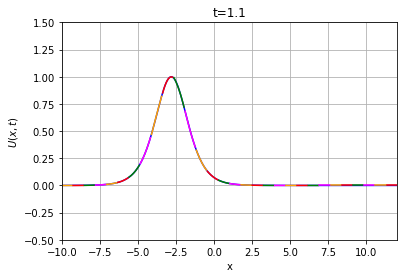

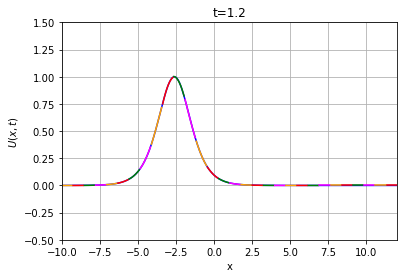

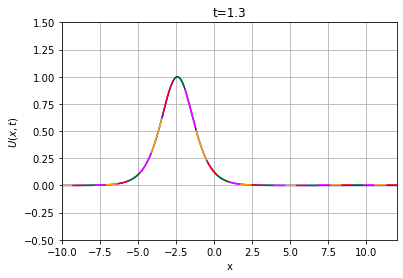

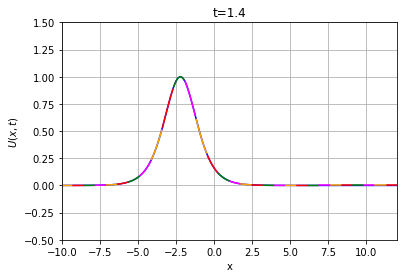

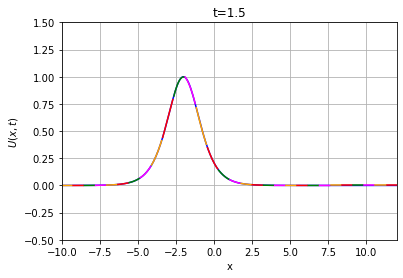

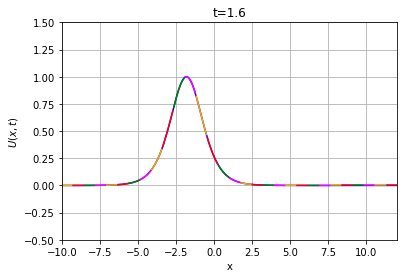

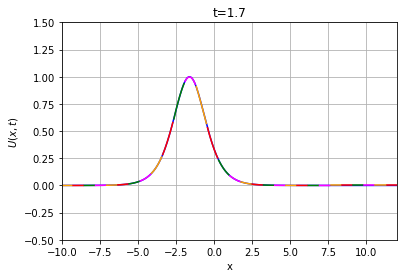

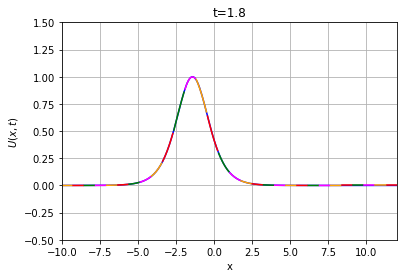

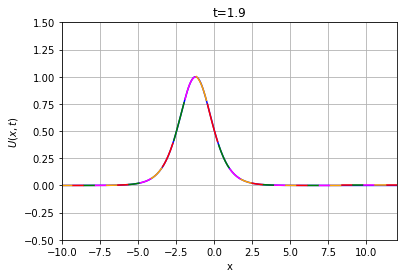

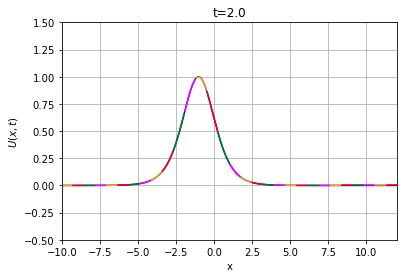

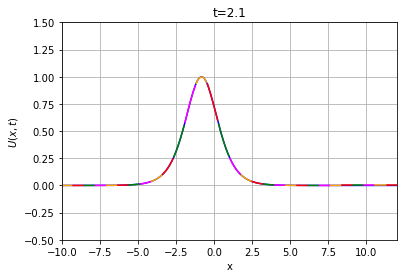

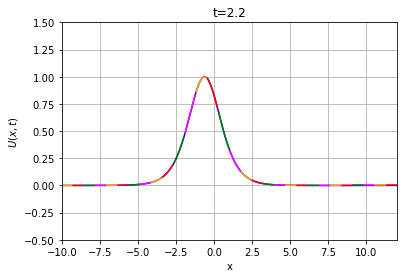

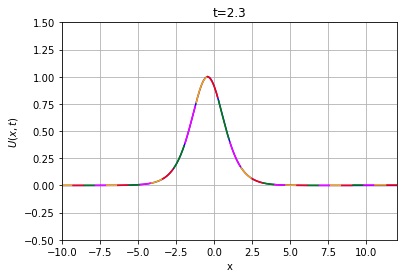

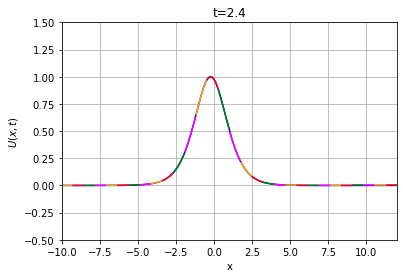

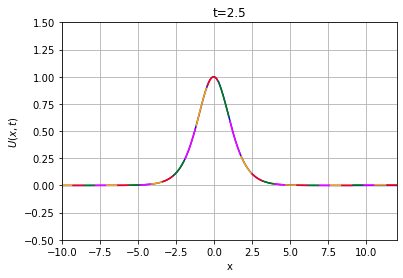

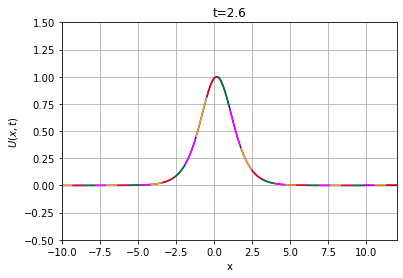

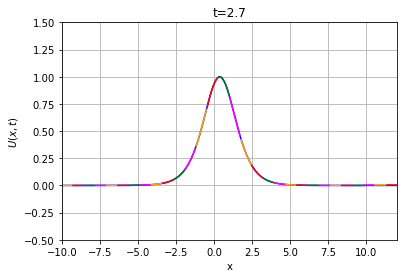

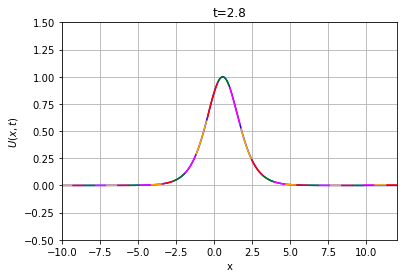

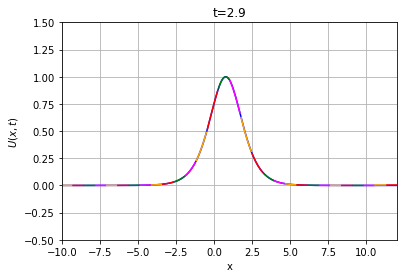

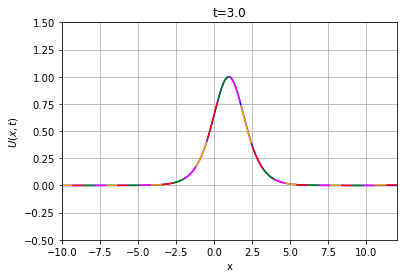

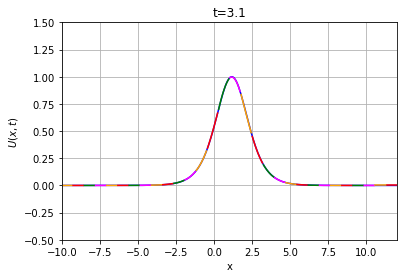

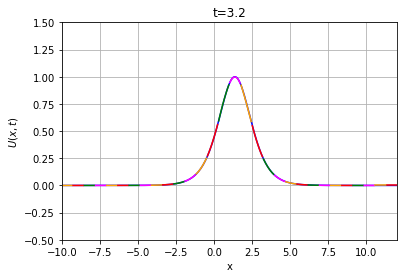

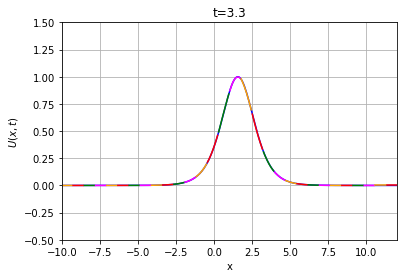

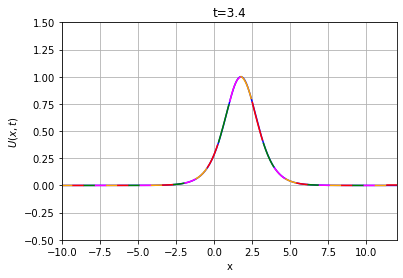

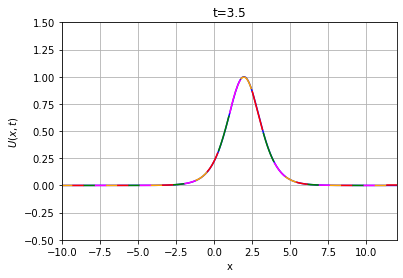

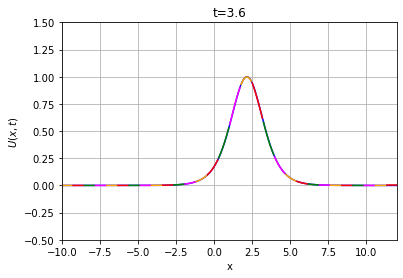

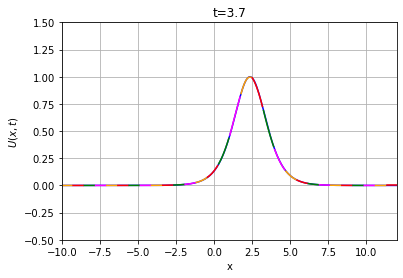

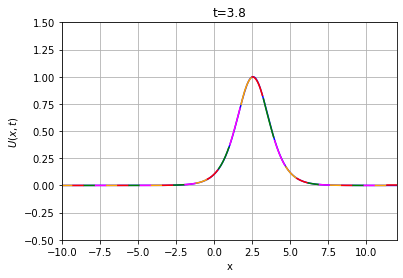

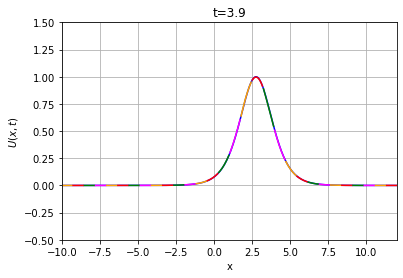

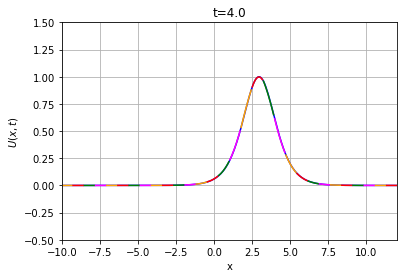

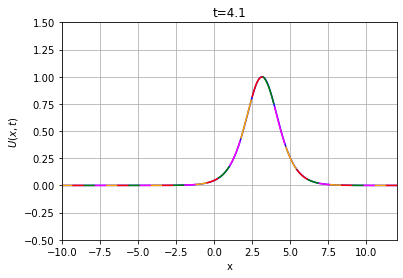

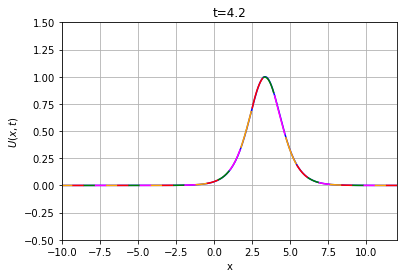

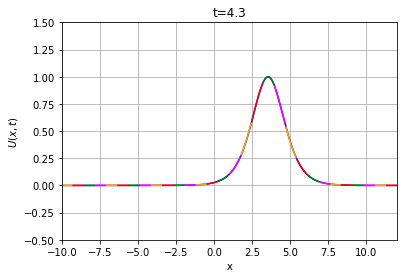

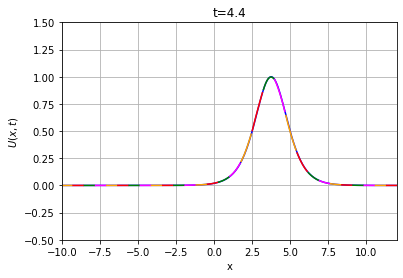

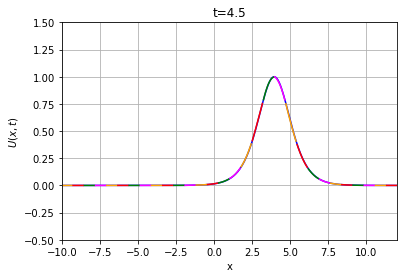

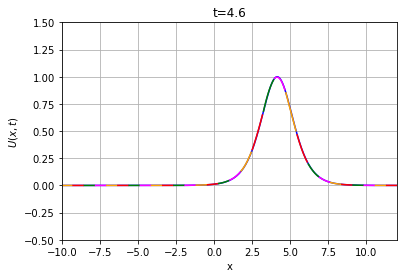

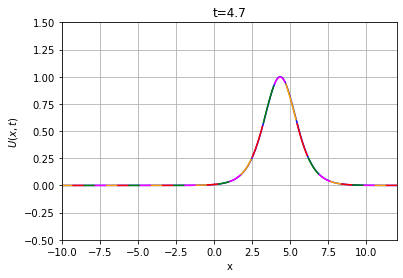

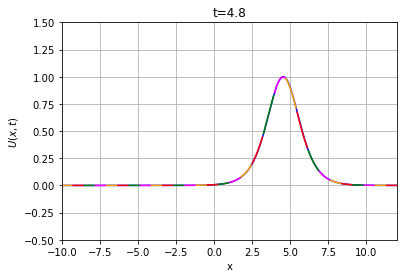

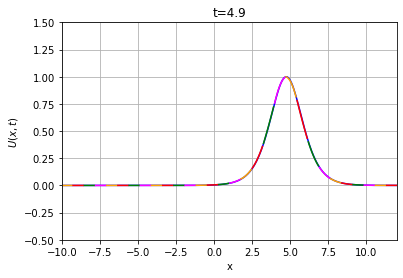

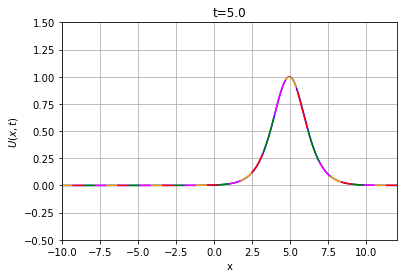

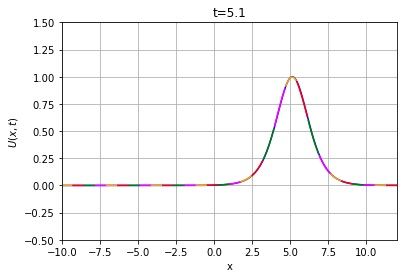

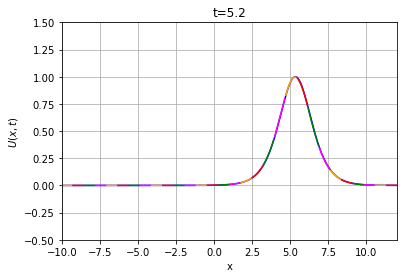

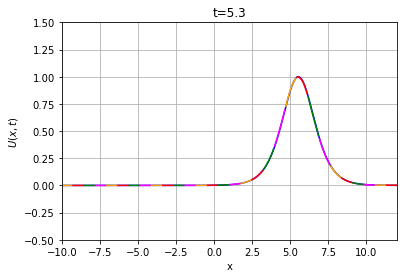

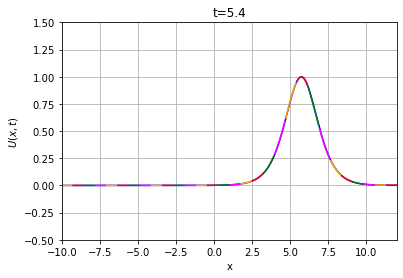

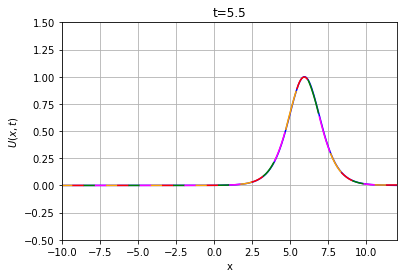

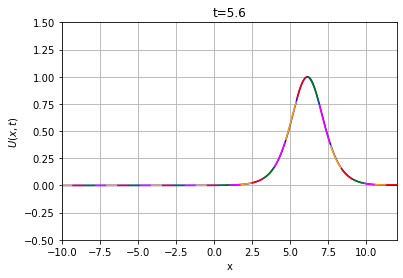

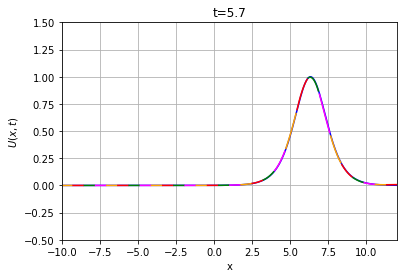

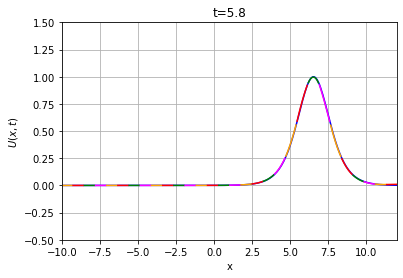

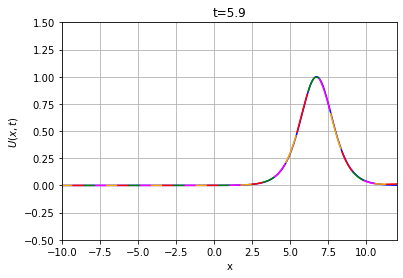

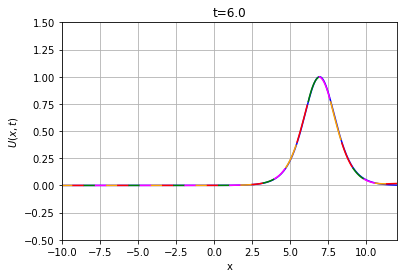

en t=0.0 la norma de U es 1.3731749954089914
en t=0.1 la norma de U es 1.3731739802149043
en t=0.2 la norma de U es 1.373173846116762
en t=0.3 la norma de U es 1.3731823843707864
en t=0.4 la norma de U es 1.3732188216541907
en t=0.5 la norma de U es 1.3733064275980806
en t=0.6 la norma de U es 1.3732980139812994
en t=0.7 la norma de U es 1.3731990767871922
en t=0.8 la norma de U es 1.3731767597152849
en t=0.9 la norma de U es 1.3731790690274244
en t=1.0 la norma de U es 1.3731708224007027
en t=1.1 la norma de U es 1.3731664275692907
en t=1.2 la norma de U es 1.3731660304129933
en t=1.3 la norma de U es 1.373165742919536
en t=1.4 la norma de U es 1.3731651998301468
en t=1.5 la norma de U es 1.3731647812697276
en t=1.6 la norma de U es 1.37316437933755
en t=1.7 la norma de U es 1.3731639539186327
en t=1.8 la norma de U es 1.373163534260927
en t=1.9 la norma de U es 1.3731631183308057
en t=2.0 la norma de U es 1.3731626978492746
en t=2.1 la norma de U es 1.3731622834988872
en t=2.2 la nor

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May  6 15:04:29 2020
@author: isaac_m

Este programa resuelve la ecuacion diferencial
u_t+(f(u))_x+u_xxx=0
por medio del metodo de Galerkin Discontinuo
con polinomios ortogonales de legendre como funciones base
"""


import numpy as np
import matplotlib.pyplot as plt
from math import pi,cosh,sqrt
import numpy.linalg as lg
xbar=-5
c=2
def f(g,x,j):#para graficar la solucion analitica
    n=len(x)
    F=np.zeros(n)
    F=(c/2)/(np.cosh(0.5*np.sqrt(c)*(x-xbar-c*j*Dt)))**2
    return F
def g(x, centro):#condicion inicial para el PVI
    return (c/2)/np.cosh(0.5*np.sqrt(c)*(x-xbar))**2

#__________________________NUMERO DE CELDAS Y FUNCIONES BASE__________________________________
'''el numero de nodos necesariamente aumenta conforme aunmenta el grado de nuestras funciones base'''
num_celdas=30           #<-numero de celdas para el dominio
num_bases=3             #numero de polinomios de legendre a utilizar
num_nodos=5             #<numero de nodos que se desean para integrar por medio de Cuadraturas de Gauss

#___________________________PARA GRAFICAR_____________________________________________________
Dt=0.0007             #<---------longitud de paso en el tiempo
fps=10                #<---------cuadros por cada segundo de t que queremos para la animacion
salto=int(1/(fps*Dt))            
inf=-10            #<---------valor minimo de x para la grafica
sup=12              #<--------valor maximo de x para la grafica
k=10                 #<-----puntos por celda que quiero que se tomen al momento de graficar
tiempo_inicial=0     #<----tiempo inicial(este no cambia)
tiempo_final=6+salto*Dt   #<--------tiempo final que muestra la animacion
'''
LO SIGUIENTE YA ES EL PROGRAMA QUE FUNCIONA EN BASE A LOS PARAMETROS ANTERIORES
'''
M=num_celdas
N=num_bases
n=k*num_celdas     #<----discretizacion para x
x=np.linspace(inf,sup,n)
# print(x)
t = np.arange(tiempo_inicial, tiempo_final, Dt)
iteraciones=len(t)
# print(t)
def cambio_variable(a,b,t):
    '''
    ENTRADAS toma la variable t en un intervalo (a,b)
    SALIDAS  y regresa un valor x en el intervalo (0,1)
    '''
    X=0.5*(b-a)*t+0.5*(a+b)
    return X
def integra(a,b,num_nodos,f,g,centro):
    '''realiza la integral por medio de cuadratura gaussiana'''
    nodos,pesos=np.polynomial.legendre.leggauss(num_nodos)
    x=cambio_variable(a,b,nodos)
    return  np.dot(pesos,(b-a)*f(x,centro)*g(x,centro)/2)
def valores_por_celda(inf,sup,num_celdas):
    centros=np.zeros((num_celdas,3))
    for p in range(num_celdas):
        for q in range(3):
            centros[p,q]=inf+(sup-inf)*(2*p+q)/(2*num_celdas)
            
    return centros
def func_base_0(x,centro):
    return 1+0*x
def func_base_1(x,centro):
    return 2*(x-centro[1])/(centro[2]-centro[0])
def func_base_2(x,centro):
    E=2*(x-centro[1])/(centro[2]-centro[0])
    return 0.5*(3*E**2-1)
def func_base_3(x,centro):
    E=2*(x-centro[1])/(centro[2]-centro[0])
    return 0.5*(5*E**3-3*E)
def Dfunc_base_0(x,centro):
    return 0+0*x
def Dfunc_base_1(x,centro):
    return 2/(centro[2]-centro[0])+0*x
def Dfunc_base_2(x,centro):
    E=2*(x-centro[1])/(centro[2]-centro[0])
    return (3*2)*E/(centro[2]-centro[0])
def Dfunc_base_3(x,centro):
    E=2*(x-centro[1])/(centro[2]-centro[0])
    return 0.5*(5*3*E**2-3) * 2/(centro[2]-centro[0])
funcion_base_num=[func_base_0,func_base_1,func_base_2,func_base_3]
derivada_base_num=[Dfunc_base_0,Dfunc_base_1,Dfunc_base_2,Dfunc_base_3]
I=valores_por_celda(inf,sup,num_celdas)
#print('valores por celda\n',I)
x=np.linspace(inf,sup,n)
def condiciones_iniciales(g):#correcto
    N=num_bases
    M=num_celdas
    C=np.zeros(N*M)
    celda=0
    while celda<M:
        for i in range(N):
            C[i+celda*N]=integra(I[celda,0],I[celda,2],num_nodos,g,funcion_base_num[i],I[celda])\
                         /integra(I[celda,0],I[celda,2],num_nodos,funcion_base_num[i],funcion_base_num[i],I[celda,:])
        celda+=1
    return C
C_I=condiciones_iniciales(g)
def A():#es una matriz diagonal
    A=np.zeros((M*N,M*N))
    for celda in range(M):
        for i in range(N):
            A[i+celda*N,i+celda*N]=integra(I[celda,0],I[celda,2],num_nodos,funcion_base_num[i],funcion_base_num[i],I[celda,:])
    return A
def P():
    P=np.zeros((M*N,M*N))
    for celda in range(M):
        for k in range(N):
            for l in range(N):
                P[k+celda*N,l+celda*N]= - integra(I[celda,0],I[celda,2],num_nodos,funcion_base_num[l],derivada_base_num[k],I[celda,:])\
                - funcion_base_num[l](I[celda,0],I[celda]) * funcion_base_num[k](I[celda,0],I[celda])
                if celda!=M-1: 
                    P[k+celda*N,l+((celda+1)%M)*N] = funcion_base_num[l](I[celda,2],I[(celda+1)%M]) * funcion_base_num[k](I[celda,2],I[celda])

    return P
def Q():#LISTO
    Q = np.zeros((M*N,M*N))
    for celda in range(M):
        for k in range(N):
            for l in range(N):
                Q[celda*N+k,celda*N+l] = integra(I[celda,0],I[celda,2],num_nodos,funcion_base_num[l],derivada_base_num[k],I[celda]) \
                + funcion_base_num[l](I[celda,0],I[celda,:]) *  funcion_base_num[k](I[celda,0],I[celda,:])
                if celda!=M-1:
                    Q[celda*N+k,((celda + 1)%M)*N+l] = - funcion_base_num[l](I[celda,2],I[(celda+1)%M,:]) * funcion_base_num[k](I[celda,2],I[celda,:])
    return Q
def U():
    U = np.zeros((M*N,M*N))
    for celda in range(M):
        for k in range(N):
            for l in range(N):
                U[celda*N+k,celda*N+l] = integra(I[celda,0],I[celda,2],num_nodos,funcion_base_num[l],derivada_base_num[k],I[celda,:]) \
                - funcion_base_num[l](I[celda,2],I[celda,:]) * funcion_base_num[k](I[celda,2],I[celda,:])
                if celda!=0:
                    U[celda*N+k,((celda-1)%M)*N+l] = funcion_base_num[l](I[celda,0],I[(celda-1)%M,:]) * funcion_base_num[k](I[celda,0],I[celda,:])
            
    return U

def funcion(u):
    return 3*u**2
def comb_lineal(u,x,celda):
    """
    el vector u es el de coeficientes u(t) en el tiempo t,
    este se va actualizando.
    Al comienzo, este es el vector de condiciones iniciales C_I
    """
    E=0
    for l in range(N):
        E+=u[celda*N+l]*funcion_base_num[l](x,I[celda,:])
    return E 
def f_comb_lineal(u,x,celda):
    """
    el vector u es el de coeficientes u(t) en el tiempo t,
    este se va actualizando.
    Al comienzo, este es el vector de condiciones iniciales C_I
    """
    E=0
    for l in range(N):
        E+=u[celda*N+l]*funcion_base_num[l](x,I[celda,:])
    return funcion(E)

def integrar(a,b,num_nodos,f,g,celda,u):
    '''realiza la integral por medio de cuadratura gaussiana'''
    nodos,pesos=np.polynomial.legendre.leggauss(num_nodos)
    x=cambio_variable(a,b,nodos)
    return  np.dot(pesos,(b-a)*f(u,x,celda)*g(x,I[celda,:])/2)
def F_(u): #LISTO
    INTEGRAL = np.zeros((N*M,1))
    EVALUACION = np.zeros((N*M,1))
    for celda in range(M):
        for k in range(N):
            INTEGRAL[celda*N+k,0] = - integrar(I[celda,0],I[celda,2],num_nodos,f_comb_lineal,derivada_base_num[k],celda,u)
            EVALUACION[celda*N+k,0] = f_comb_lineal(u,I[celda,2],celda) * funcion_base_num[k](I[celda,2],I[celda])
            if celda!=0:
                EVALUACION[celda*N+k,0] += - f_comb_lineal(u,I[celda,0],(celda-1)%M) * funcion_base_num[k](I[celda,0],I[celda])
    return INTEGRAL+EVALUACION
def d_sol(x,t):
    derivadas012=[(-c/2)/(np.cosh(0.5*np.sqrt(c)*(x-xbar-c*t)))**2,
                  (0.5*c**1.5)*(np.tanh(0.5*np.sqrt(c)*(-xbar-c*t+x)))/(np.cosh(0.5*np.sqrt(c)*(xbar+c*t-x)))**2,
                  0.25 * c * (c / (np.cosh(0.5*np.sqrt(c)*(xbar+c*t-x)))**4 )\
                   - 2*c*np.tanh(0.5*np.sqrt(c)*(-xbar-c*t+x))**2/(np.cosh(0.5*np.sqrt(c)*(xbar+c*t-x))**2)  ]
    return derivadas012
def F1(t):#LISTO
    FLUX= np.zeros((M*N,1))
    for k in range(N):
        celda=M-1
        #el primer termino es el flujo de p por la frontera izquierda y el segundo es el flujo de F(u) por la izquierda
        FLUX[celda*N+k,0] = d_sol(I[celda,2],t)[2]*funcion_base_num[k](I[celda,2],I[celda])
        celda=0
        FLUX[celda*N+k,0] = - funcion(d_sol(I[celda,0],t)[0])*funcion_base_num[k](I[celda,0],I[celda])

    return FLUX
def F2(t):
    FLUX= np.zeros((M*N,1))
    for k in range(N):
        celda=M-1
        FLUX[celda*N+k,0] = - d_sol(I[celda,2],t)[1]*funcion_base_num[k](I[celda,2],I[celda])
    return FLUX
def F3(t):#LISTO
    FLUX= np.zeros((M*N,1))
    for k in range(N):
        celda=0
        FLUX[celda*N+k,0] = d_sol(I[celda,0],t)[0]*funcion_base_num[k](I[celda,0],I[celda])
    return FLUX
"""
CON ESTO YA TENEMOS TODAS NUESTRAS FUNCIONES EXPRESADAS COMO MATRICES Y VECTORES
"""
A_i=lg.inv(A())
MP=np.dot(A_i,P())
MQ=np.dot(A_i,Q())
MU=np.dot(A_i,U())
MPMQMU=np.dot(MP,np.dot(MQ,MU))
MPMQ=np.dot(MP,MQ)
def F(t,u):
    MF1 = np.dot(A_i,F1(t))
    MF2 = np.dot(A_i,F2(t))
    MF3 = np.dot(A_i,F3(t))
    MF =  np.dot(A_i,F_(u))
    u_t= - MF - np.dot(MPMQMU,u.reshape(M*N,1)) - np.dot(MPMQ,MF3) + np.dot(MP,MF2)-MF1
    return u_t
def RUNGE_KUTTA_3(N,tiempo_inicial,tiempo_final,F,NumIncognitas,condiciones_iniciales):#correcto
    t=np.linspace(tiempo_inicial,tiempo_final,N)
    h=(tiempo_final-tiempo_inicial)/N
    w=np.zeros((N,NumIncognitas))#vector_de arranque
    w[0,:]=condiciones_iniciales
    i=1
    for k in range(1,N):
        k1=(F(t[k-1],w[k-1,:])).reshape(NumIncognitas,)
        k2=(F(t[k-1]+h/2,w[k-1,:]+(h/2)*k1)).reshape(NumIncognitas,)
        k3=(F(t[k-1]+0.75*h,w[k-1,:]+0.75*h*k2)).reshape(NumIncognitas,)
        w[k,:]=w[k-1,:]+(h/9)*(2*k1+3*k2+4*k3)
        if k==100*i:
            print(100*k/N,"%")
            i+=1
    return w

#comentar estas dos lineas y descomentar la 3ra para usar el txt con los resultados ya guardados
# coeficientes=RUNGE_KUTTA_3(iteraciones,tiempo_inicial,tiempo_final,F,num_celdas*num_bases,C_I)
# np.savetxt("coeficientes_30c3b5ndt0-0007.txt",coeficientes)
coeficientes=np.loadtxt("coeficientes_30c3b5ndt0-0007.txt")
#MATRIZ PARA GRAFICAR LAS COMBINACIONES LINEALES DE CADA CELDA    
U_=np.zeros((len(x),len(t)//salto))
for j in range(len(t)//salto):#corre para tiempo
    for l in range(num_celdas):
        centro=I[l,:]
        for i in range(k):#corre para espacio x
            for r in range(num_bases):#este es para que haga la sumatoria
                U_[i+k*l,j]+=coeficientes[j*salto,num_bases*l+r]*funcion_base_num[r](x[i+k*l],centro)
#%%
# plt.ion()#para permitir grafica animada
# plt.figure()
# for i in range(len(t)//salto):
#     plt.clf()
#     plt.xlim()
#     plt.plot(x,U_[:,i],color='red',label='Solucion numerica') #sol numerica
# #---------EL SIGUIENTE CICLO ES PARA MOSTRAR LA DISCONTINUIDAD EN CADA CELDA,
# #---------COMENTAR LA LINEA DE ARRIBA Y DESCOMENTAR ESTE EN CASO DE QUE QUIERA MOSTRARLO DE ESA FORMA
# #    for celda in range (k*M):
# #        plt.plot(x[celda*k:(celda+1)*k],U_[celda*k:(celda+1)*k,i],color='red') #sol numerica
#     plt.plot(x,f(g,x,salto*i),color='blue',linewidth=0.8,label='Solucion Analitica')#sol analitica

#     plt.grid(True)
#     plt.axis((inf,sup,-0.5,1.5))
#     plt.xlabel('x')
#     plt.ylabel('U(x,t)')
# #    plt.title('t=%.1f,instante numero %.2f,%.3f'%(salto*i*Dt,salto*i,U_[0,i]-U_[len(x)-1,i]))
#     plt.title('t=%.1f'%(salto*i*Dt))
#     plt.legend()
#     plt.show()
#     plt.pause(0.01)
    
plt.ion()#para permitir grafica animada donde se note la separacion entre celdas
plt.figure()
color=['Orange','Red','green','Magenta']
for i in range(len(t)//salto):
    plt.clf()
    plt.xlim()
    plt.plot(x,f(g,x,salto*i),color='Blue',label='U')       #graficando la solucion analitica
    for celda in range (k*M):
        plt.plot(x[celda*k:(celda+1)*k],U_[celda*k:(celda+1)*k,i],color=color[celda%len(color)])#graficando la aproximacion
    plt.grid(True)
    plt.axis((inf,sup,-0.5,1.5))
    plt.xlabel('x')
    plt.ylabel('$U(x,t)$')
    # plt.title('t=0')
#    plt.title('t=%.1f,instante numero %.2f,%.3f'%(salto*i*Dt,salto*i,U[0,i]-U[len(x)-1,i]))
    plt.title('t=%.1f'%(salto*i*Dt))
    # plt.legend()
    plt.show()
    plt.pause(0.01)
#%%


(61, 300)
(61, 300)


C:\Users\Isaac\AppData\Local\Temp/ipykernel_16196/575180609.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


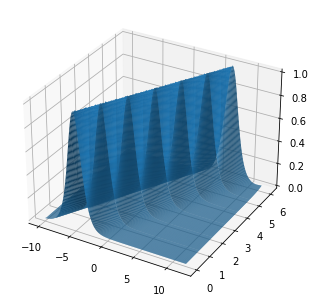

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
t_=np.linspace(tiempo_inicial,tiempo_final,np.shape(U_)[1])
#print(np.shape(U)[1])
X,T=np.meshgrid(x,t_)
print(np.shape(X))
print(np.shape(T))
ax.plot_surface(X,T,U_.T,cstride=1)

[0.         0.10165167 0.20330333 0.304955   0.40660667 0.50825833
 0.60991    0.71156167 0.81321333 0.914865   1.01651667 1.11816833
 1.21982    1.32147167 1.42312333 1.524775   1.62642667 1.72807833
 1.82973    1.93138167 2.03303333 2.134685   2.23633667 2.33798833
 2.43964    2.54129167 2.64294333 2.744595   2.84624667 2.94789833
 3.04955    3.15120167 3.25285333 3.354505   3.45615667 3.55780833
 3.65946    3.76111167 3.86276333 3.964415   4.06606667 4.16771833
 4.26937    4.37102167 4.47267333 4.574325   4.67597667 4.77762833
 4.87928    4.98093167 5.08258333 5.184235   5.28588667 5.38753833
 5.48919    5.59084167 5.69249333 5.794145   5.89579667 5.99744833
 6.0991    ]
[1.373175   1.37317398 1.37317385 1.37318238 1.37321882 1.37330643
 1.37329801 1.37319908 1.37317676 1.37317907 1.37317082 1.37316643
 1.37316603 1.37316574 1.3731652  1.37316478 1.37316438 1.37316395
 1.37316353 1.37316312 1.3731627  1.37316228 1.37316186 1.37316145
 1.37316101 1.3731606  1.37316017 1.37315974 1.37

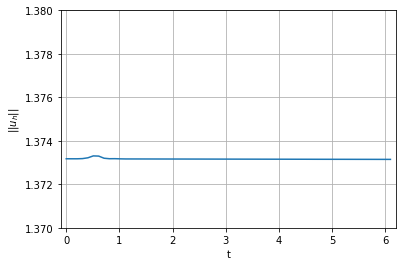

In [22]:
from numpy import sinh,cosh,tanh
def coth(x):
    return 1./tanh(x)
def sech(x):
    return 1./cosh(x)
def csch(x):
    return 1./sinh(x)
""" CALCULANDO LA NORMA DE LA SOLUCION """
norma2=np.zeros(len(t)//salto)
for t_ in range(len(t)//salto):
    for i in range(M):
        for l in range(N):
            norma2[t_]+=coeficientes[t_,i*N+l]**2 * integra(I[i,0],I[i,2],num_nodos,funcion_base_num[l],funcion_base_num[l],I[i,:])
    norma=np.sqrt(norma2)
#    print('en t=%.1f'%(salto*t_*Dt),'la norma de U es',norma[t_])
""" GRAFICANDO LA NORMA DE U_h EN EL TIEMPO """

T=np.linspace(t[0],t[-1],len(t)//salto)
print(T)
print(norma)
plt.figure()
plt.plot(T,norma)
plt.xlim(t[0]-.1,t[-1]+.1)
plt.ylim(1.37,1.38)
plt.xlabel('t')
plt.ylabel('$||u_h||$')
plt.grid(True)
plt.show()


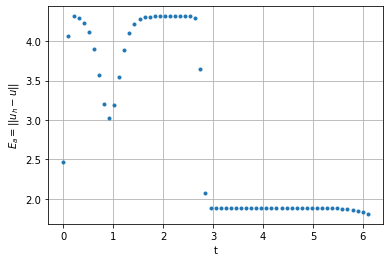

In [25]:
#%%
""" Calculando el error ||u_h - u|| EN EL TIEMPO"""
def solucion(x,t):
    return 6*(4*csch(np.sqrt(2)*(x-8*t+10))**2 + sech(1/np.sqrt(2)*(x-2*t))**2) / (np.sqrt(8)*coth(np.sqrt(2)*(x-8*t+10))-np.sqrt(2)*np.tanh((1/np.sqrt(2))*(x-2*t)))**2
def sol_num(x,t_,celda):
    u_h=0
    for l in range(N):
        u_h += coeficientes[t_,celda*N+l] * funcion_base_num[l](x,I[celda,:])
    return u_h
def error(x,t_,celda):
    return abs(solucion(x,t_*Dt*salto) - sol_num(x,t_*salto,celda))
def ERROR(u,u_h,t,celda,num_nodos):
    '''realiza la integral por medio de cuadratura gaussiana'''
    nodos,pesos=np.polynomial.legendre.leggauss(num_nodos)
    a=I[celda,0]
    b=I[celda,-1]
    x=cambio_variable(a,b,nodos)
#    print(x)
    integral=np.dot(pesos,(b-a)*(error(x,t,celda))**2  /2)
    return  integral
#%%
#error(sup,0,0)
#print(len(t)//salto)
#ERROR(solucion,sol_num,10,32,num_nodos)
#%%
E_a=np.zeros(len(t)//salto)
for t_ in range(0,len(t)//salto):
#    print(t_)
    for celda in range(M):
        E_a[t_] += ERROR(solucion,sol_num,t_,celda,num_nodos)
#        print(E_a[t_])
#    print('en t=%.1f'%(t_*salto*Dt),'el ERROR es',np.sqrt(E_a[t_]))
plt.figure()
plt.plot(T,np.sqrt(E_a),'.')
plt.xlabel('t')
plt.ylabel('$E_a=||u_h-u||$')
plt.grid(True)
plt.show()